# Apply machine learning algorithms to a voice recording dataset to 
# accurately diagnose Parkinsons Disease
# Classify the patients into the respective labels using the attributes from
# their voice recordings

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data 
pdata = pd.read_csv("Parkinsons.csv")

In [3]:
pdata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
pdata.shape

(195, 24)

In [5]:
#Check the column names
pdata.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# Name is string, rest all independent features are float, dependent variable status is int.

In [8]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
# check for null values

In [10]:
pdata.isnull().values.any()

False

In [11]:
missingValue = pdata.isnull().sum()
print(missingValue)

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [12]:
# No missing values

In [13]:
# Inspect the data for the balance of patients with Parkinsons disease and patients without

In [14]:
pdata["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [15]:
(pdata["status"].value_counts()/pdata.shape[0])*100

1    75.384615
0    24.615385
Name: status, dtype: float64

In [16]:
# 1: 147, patients with Parkinsons disease is more than patient without
# 75% of the patients in data are having PD disease 

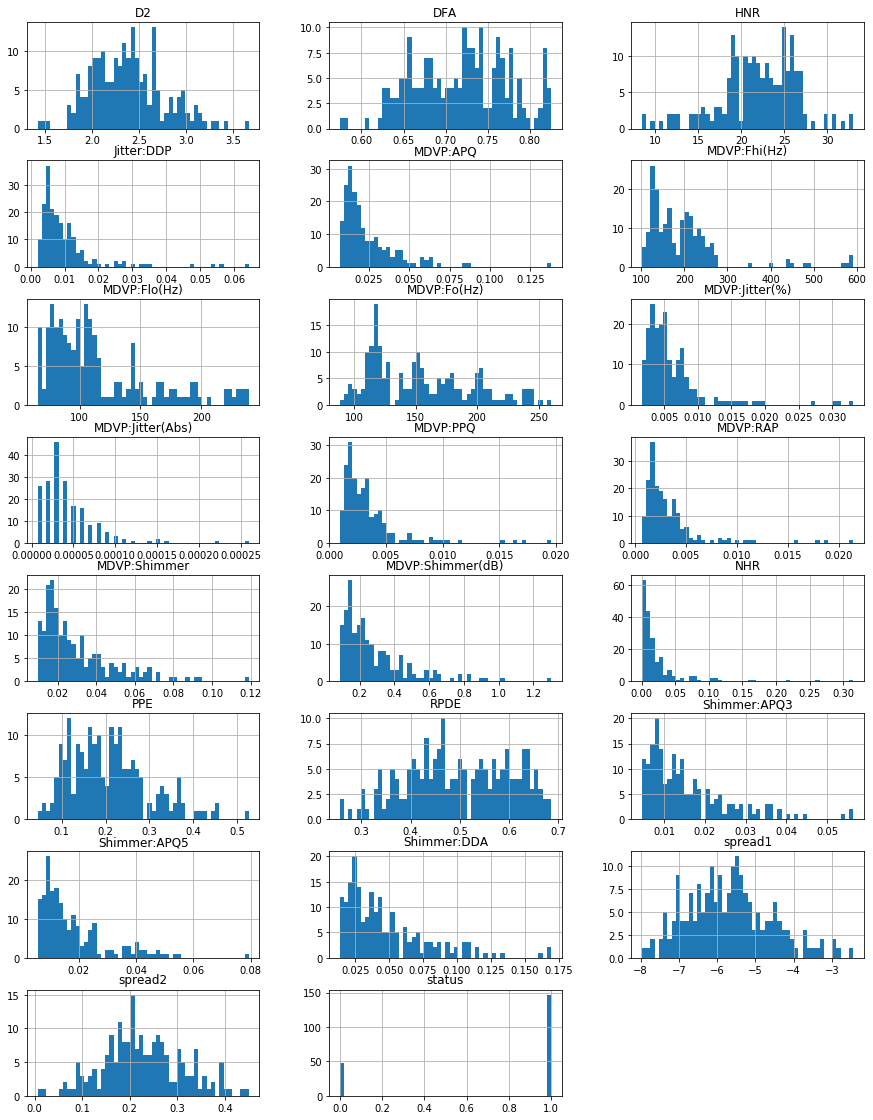

In [17]:
pdata.hist(stacked=True, bins=50, figsize=(15,35), layout=(14,3)); 

In [18]:
# Distribution of target column

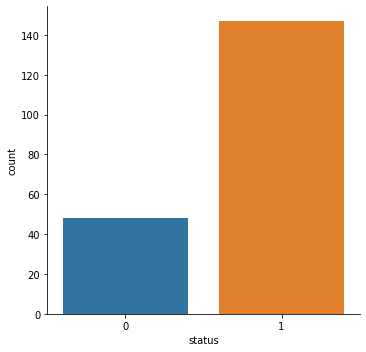

In [19]:
sns.catplot(x="status", kind="count", data= pdata, orient="h")

In [20]:
# This data provides data more on patients with Parkinsons disease 
# so it will be good to analyze what factors relate more to the disease

In [21]:
# Correlation heat map

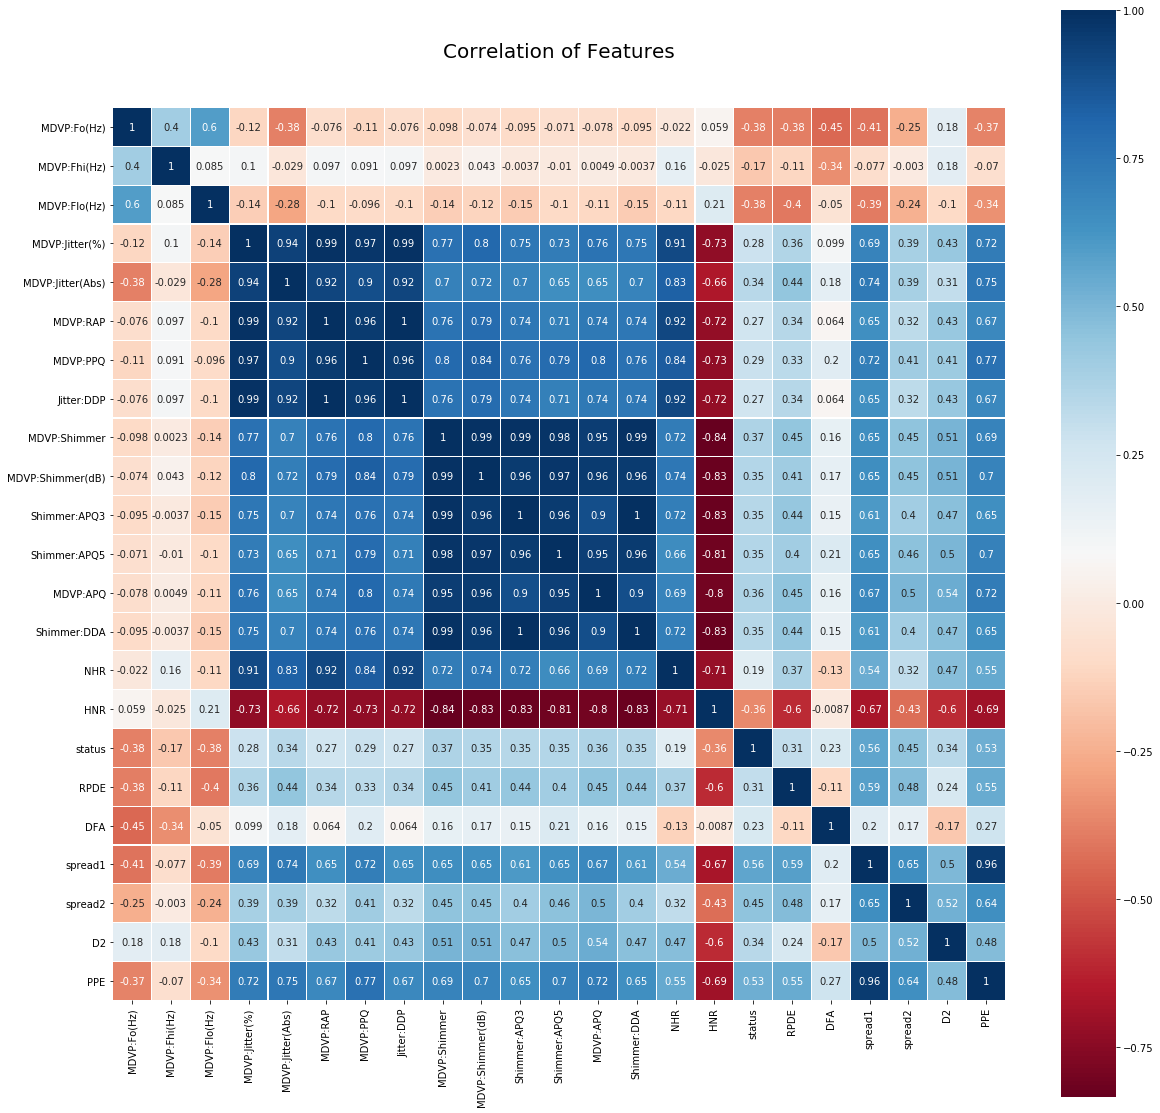

In [22]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(pdata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [23]:
# Pair plot to check relationship

# Distribution of vocal fundamental frequency

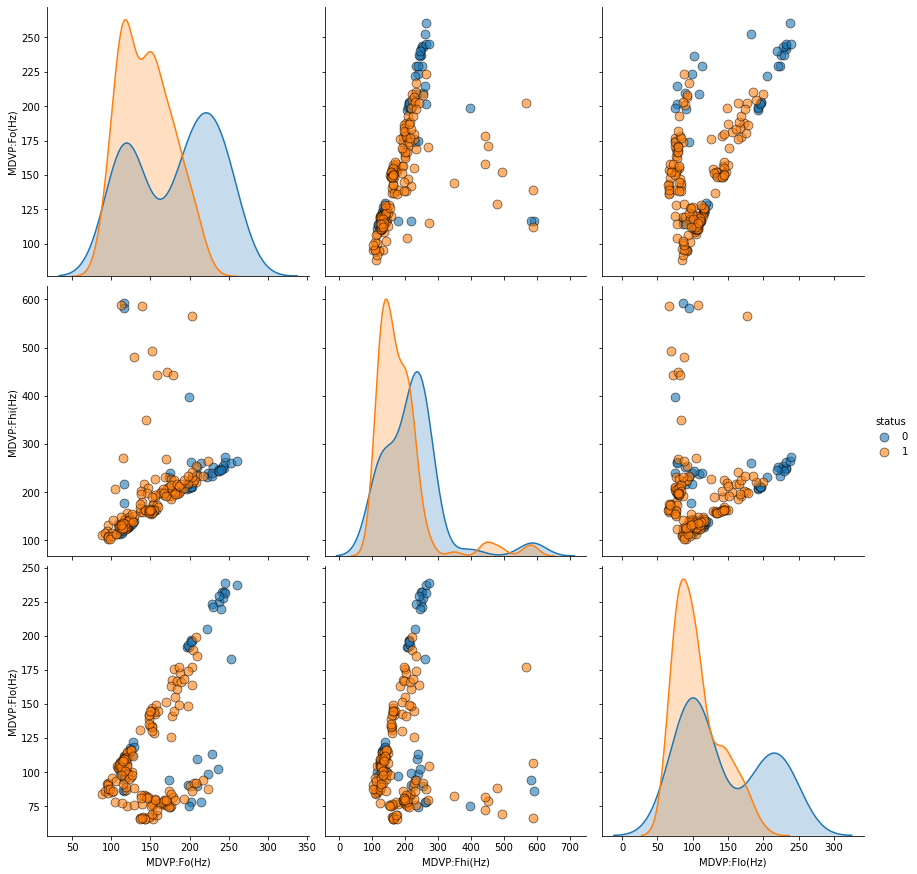

In [24]:
sns.pairplot(pdata, 
             vars = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

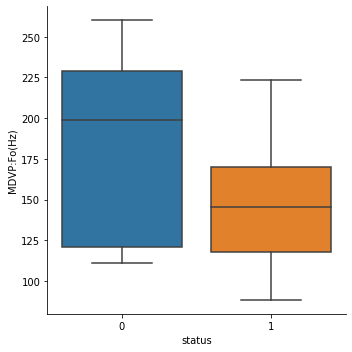

In [25]:
sns.catplot(x="status", y="MDVP:Fo(Hz)", kind="box", data=pdata)

In [26]:
# For persons having lower vocal fundamental frequency is more prone towards Parkinsons disease 

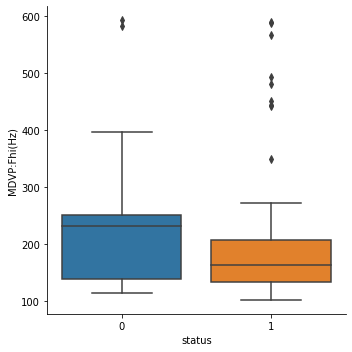

In [27]:
sns.catplot(x="status", y="MDVP:Fhi(Hz)", kind="box", data=pdata)

In [28]:
# Maximum vocal frequency for patients having Parkinsons disease is on the lower end.

# Distribution for Several measures of variation in fundamental frequency

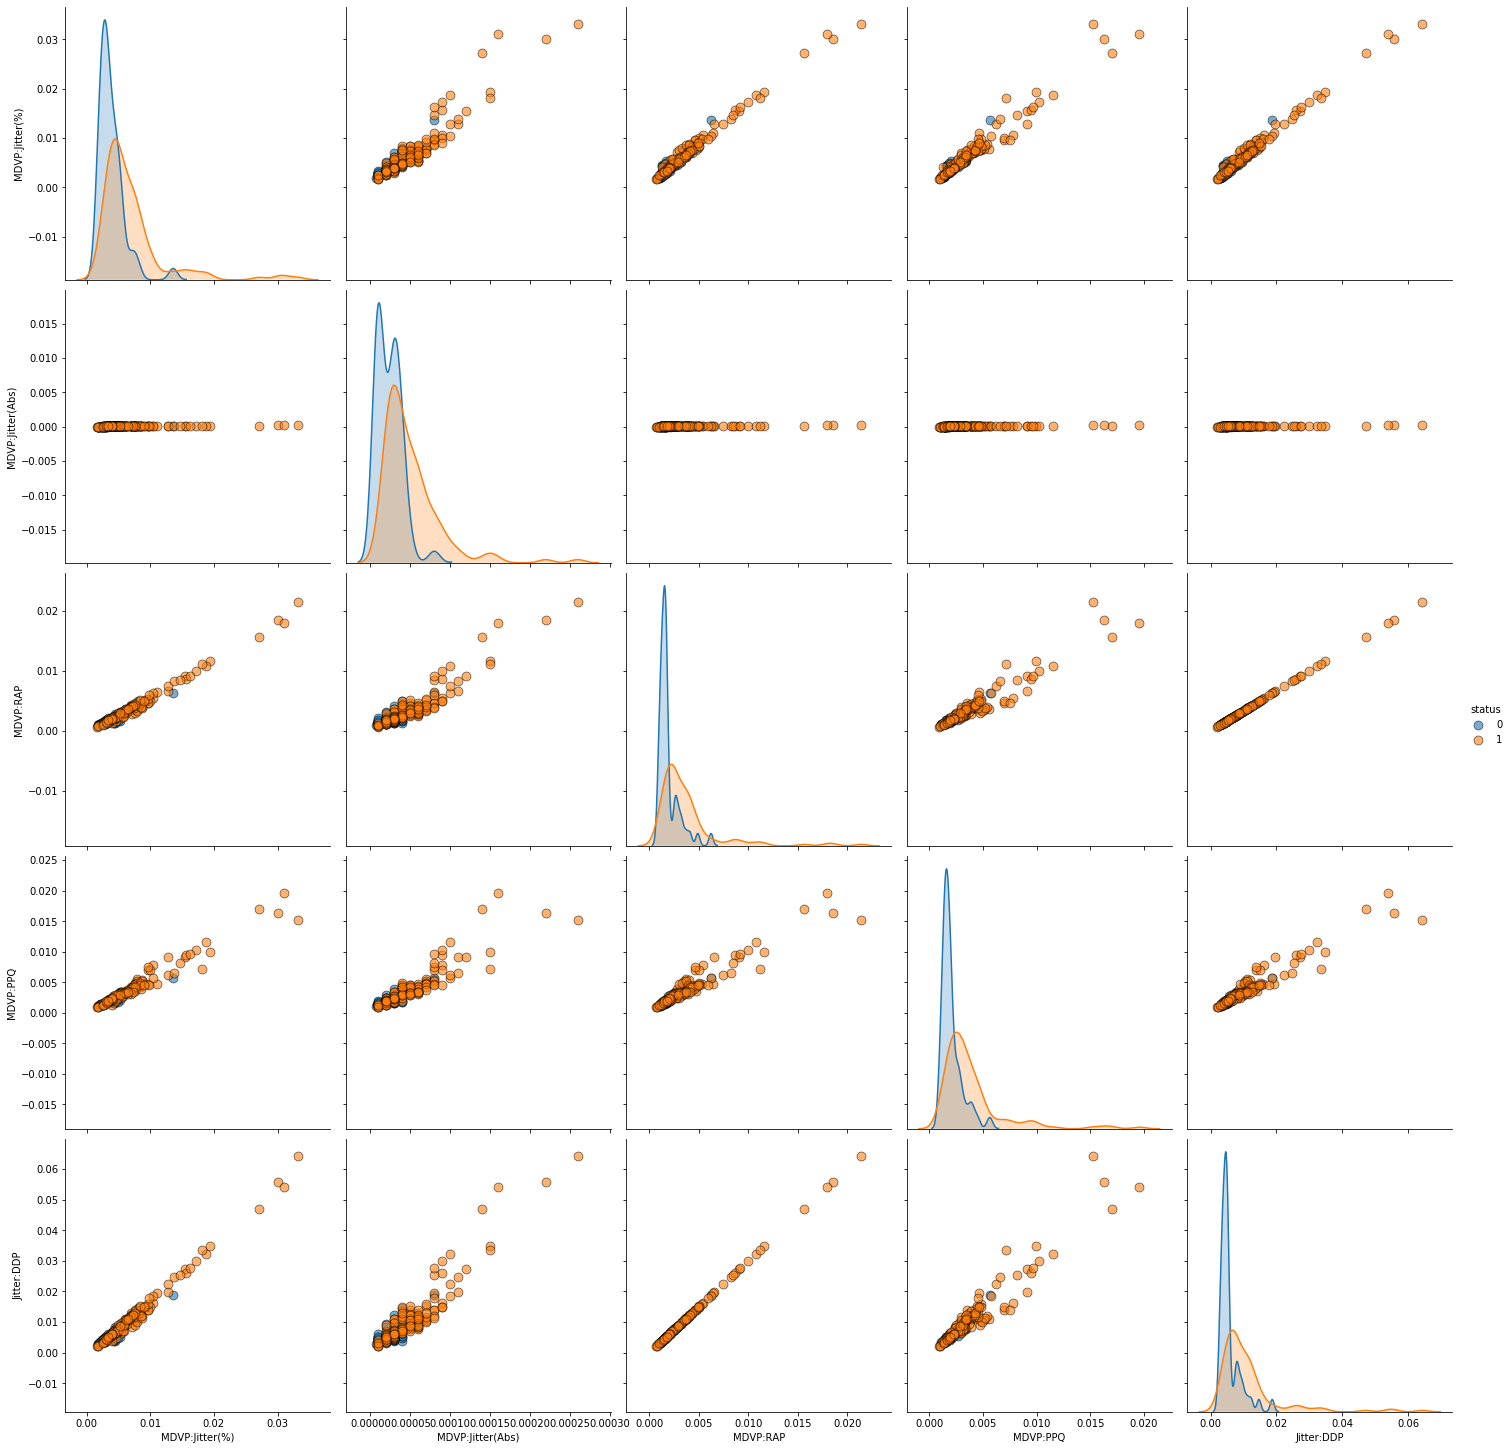

In [29]:
sns.pairplot(pdata, 
             vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

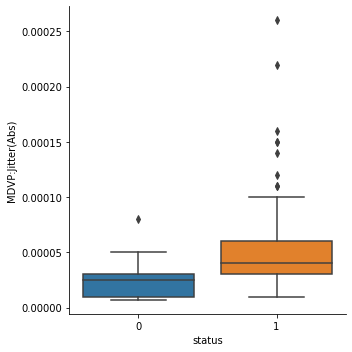

In [30]:
sns.catplot(x="status", y="MDVP:Jitter(Abs)", kind="box", data=pdata)

In [31]:
# Jitter for patients with Parkinsons disease in on higher side

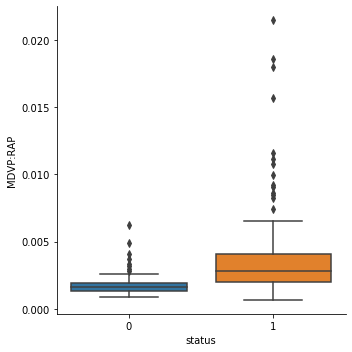

In [32]:
sns.catplot(x="status", y="MDVP:RAP", kind="box", data=pdata)

In [33]:
#Relative measure of the pitch (RAP) is on higher end for Parkinsons patients 

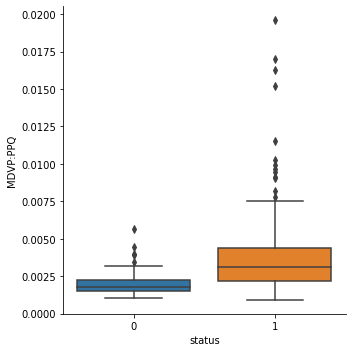

In [34]:
sns.catplot(x="status", y="MDVP:PPQ", kind="box", data=pdata)

In [35]:
# pitch perturbation quotient (PPQ) of patients with Parkinsons disease in on higher side

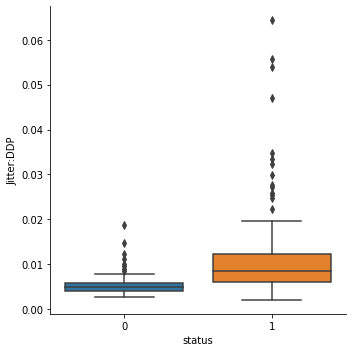

In [36]:
sns.catplot(x="status", y="Jitter:DDP", kind="box", data=pdata)

In [37]:
# Jitter:DDP is also on higher side for patients with Parkinsons disease

# Distribution of Several measures of variation in amplitude

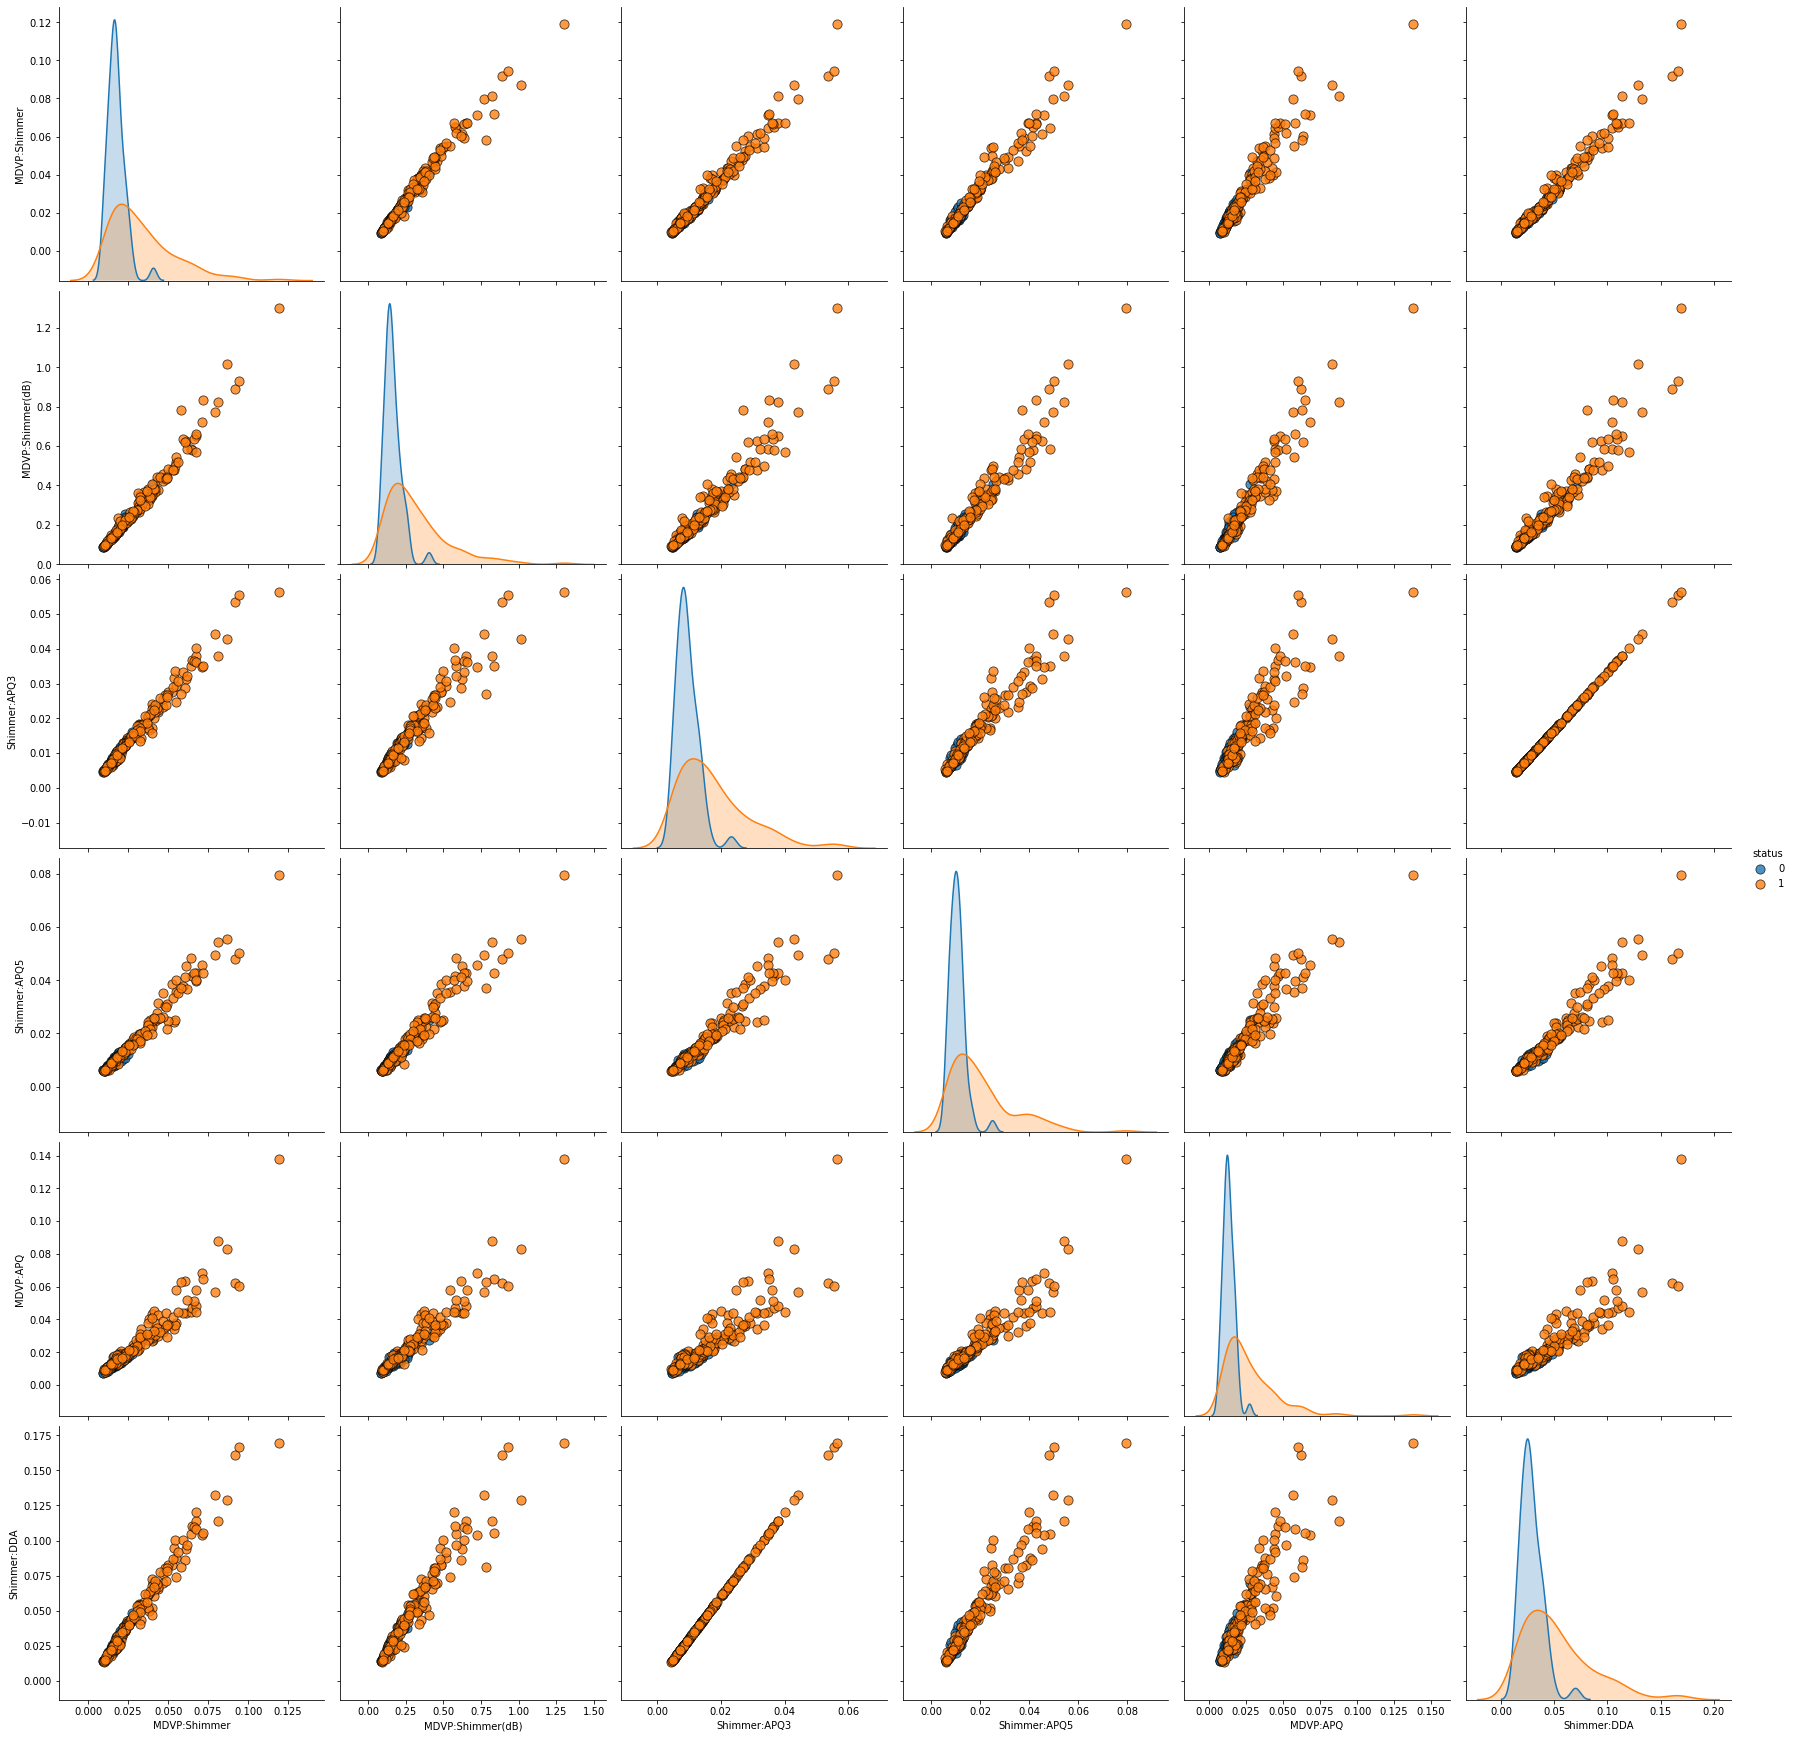

In [38]:
sns.pairplot(pdata, 
             vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 4);

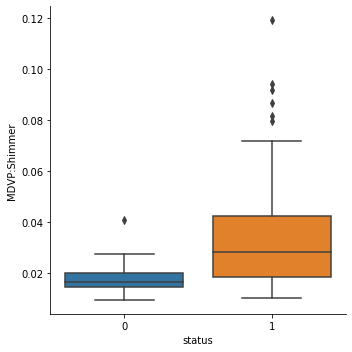

In [39]:
sns.catplot(x="status", y="MDVP:Shimmer", kind="box", data=pdata)

In [40]:
# MDVP:Shimmer is higher for patients with Parkinsons disease

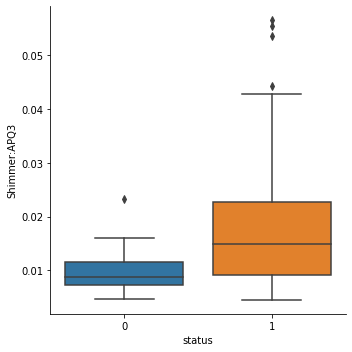

In [41]:
sns.catplot(x="status", y="Shimmer:APQ3", kind="box", data=pdata)

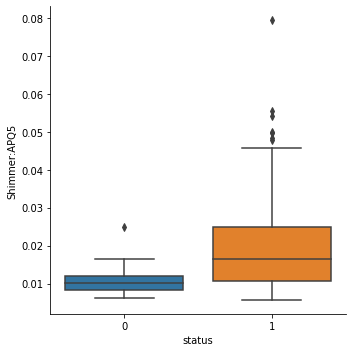

In [42]:
sns.catplot(x="status", y="Shimmer:APQ5", kind="box", data=pdata)

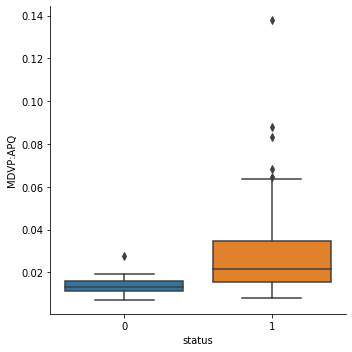

In [43]:
sns.catplot(x="status", y="MDVP:APQ", kind="box", data=pdata)

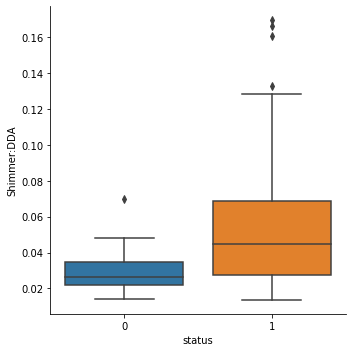

In [44]:
sns.catplot(x="status", y="Shimmer:DDA", kind="box", data=pdata)

In [45]:
# All metrics related to variation in amplitude is higher for patients with Parkinsons disease

# Distribution of measures of ratio of noise to tonal components in the voice

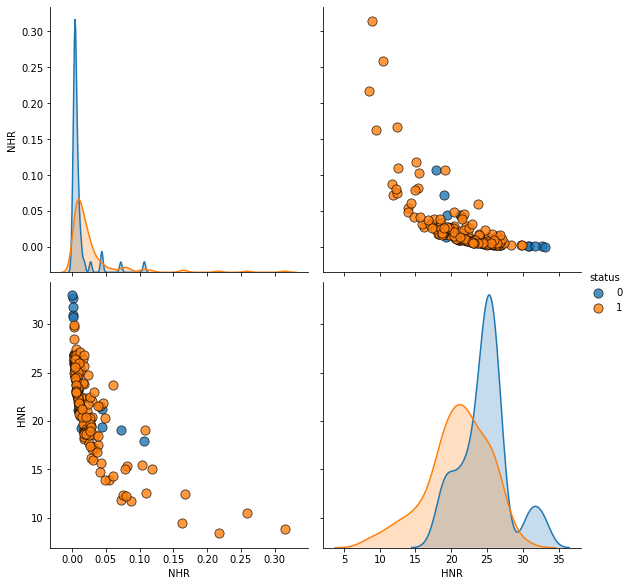

In [46]:
sns.pairplot(pdata, 
             vars = ['NHR','HNR'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 4);

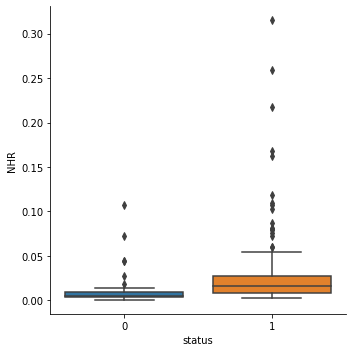

In [47]:
sns.catplot(x="status", y="NHR", kind="box", data=pdata)

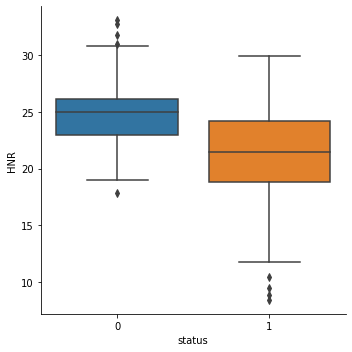

In [48]:
sns.catplot(x="status", y="HNR", kind="box", data=pdata)

In [49]:
# Both NHR and HNR did not follow normal distribution, also HNR for patients with Parkinsons disease is less 

# Distribution of nonlinear dynamical complexity measures

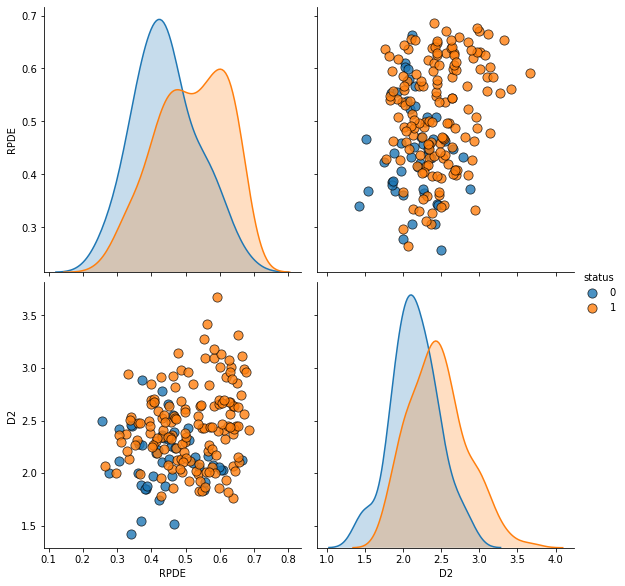

In [50]:
sns.pairplot(pdata, 
             vars = ['RPDE','D2'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 4);

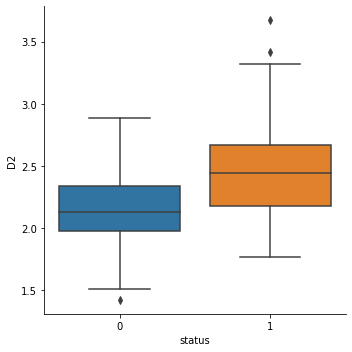

In [51]:
sns.catplot(x="status", y="D2", kind="box", data=pdata)

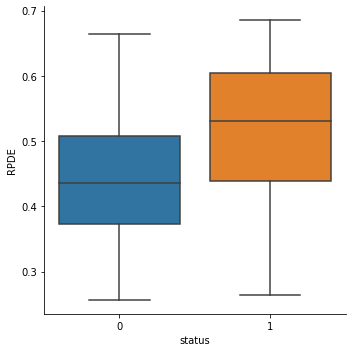

In [52]:
sns.catplot(x="status", y="RPDE", kind="box", data=pdata)

In [53]:
# Both the measures of dynamical complexity is higher for patients with Parkinsons disease

# Distribution of Signal fractal scaling exponent

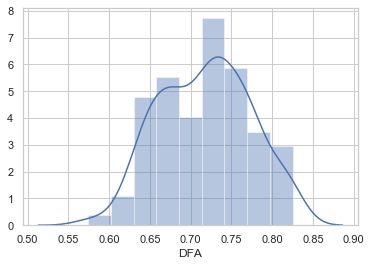

In [54]:
sns.set(style="whitegrid", color_codes=True)
sns.distplot(pdata["DFA"])

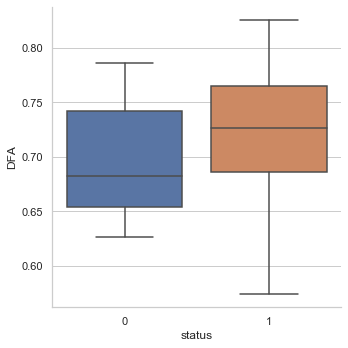

In [55]:
sns.catplot(x="status", y="DFA", kind="box", data=pdata)

In [56]:
# Though DFA follows normal distribution, but still DFA for patients with Parkinsons disease is on higher end

# Distribution of nonlinear measures of fundamental frequency variation

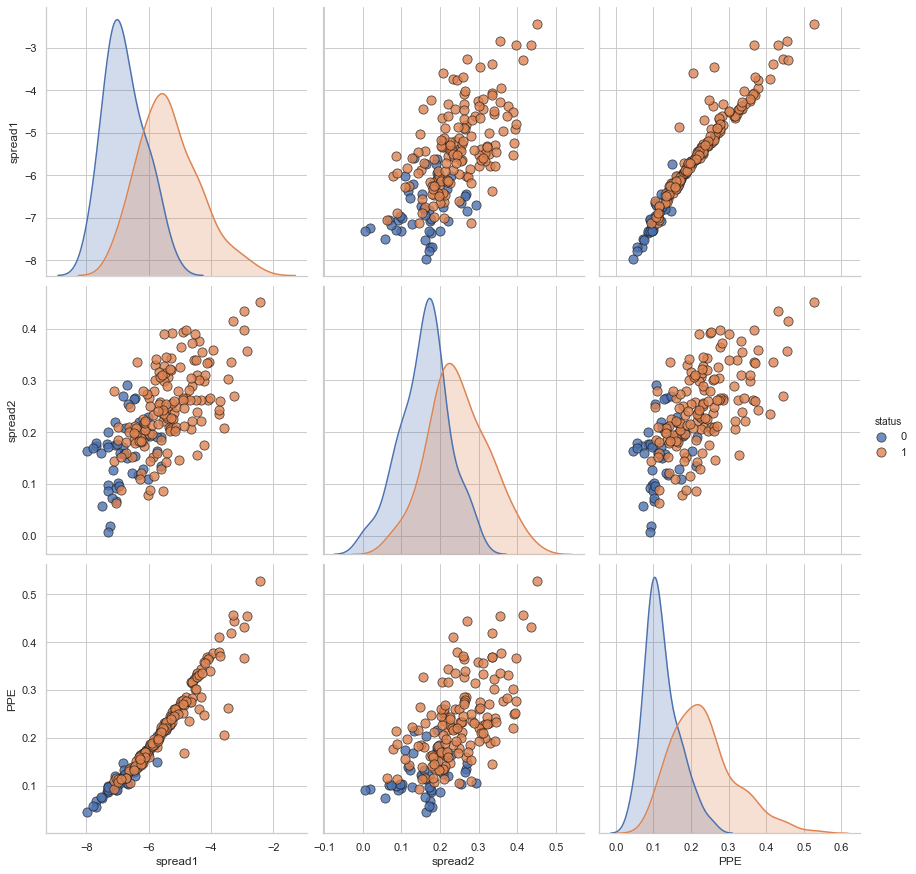

In [57]:
sns.pairplot(pdata, 
             vars = ['spread1','spread2','PPE'], 
             hue = 'status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 4);

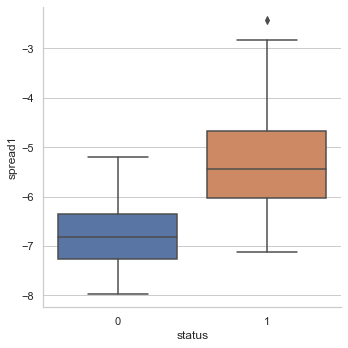

In [58]:
sns.catplot(x="status", y="spread1", kind="box", data=pdata)

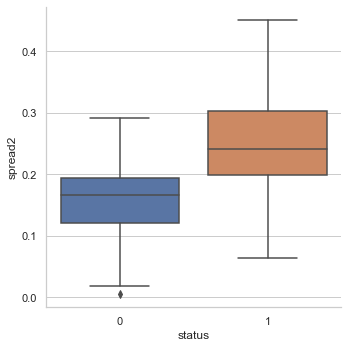

In [59]:
sns.catplot(x="status", y="spread2", kind="box", data=pdata)

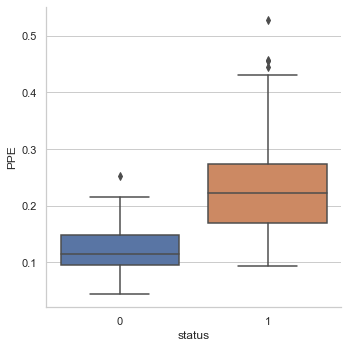

In [60]:
sns.catplot(x="status", y="PPE", kind="box", data=pdata)

In [61]:
# All three non-linear measures of fundamental frequency variation seems to be on higher side for patients with Parkinsons disease

# Split the dataset into training and test set in the ratio of 70:30

In [62]:
pdatafinal = pdata.drop(['name'],axis=1)

In [63]:
X = pdatafinal.drop(labels="status", axis=1)
y= pdatafinal["status"]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [66]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.74% data is in training set
30.26% data is in test set


# Data Preparation for Training

In [67]:
# Scale the data

In [68]:
from scipy.stats import zscore

In [69]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

# Train on Logistic Regression

In [70]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [71]:
#Fit the model on train
model = LogisticRegression(solver="liblinear")
result = model.fit(X_train_scaled,y_train)

In [72]:
#predict on test
y_predict = model.predict(X_test_scaled)

In [73]:
lr_score = metrics.accuracy_score(y_test, y_predict)

In [74]:
print("Model Accuracy: {0:.4f}".format(lr_score))

Model Accuracy: 0.8305


# Train on Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
modelNBC = GaussianNB()

In [77]:
modelNBC.fit(X_train_scaled, y_train)

GaussianNB()

In [78]:
y_predict_nbc = modelNBC.predict(X_test_scaled)

In [79]:
nb_score = metrics.accuracy_score(y_test, y_predict_nbc)

In [80]:
print("Model Accuracy: {0:.4f}".format(nb_score))

Model Accuracy: 0.6271


# Train on KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
modelKNN = KNeighborsClassifier(n_neighbors= 40 , weights = 'distance' )

In [83]:
modelKNN.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=40, weights='distance')

In [84]:
y_predict_knn = modelKNN.predict(X_test_scaled)

In [85]:
knn_score = metrics.accuracy_score(y_test, y_predict_knn)

In [86]:
print("Model Accuracy: {0:.4f}".format(knn_score))

Model Accuracy: 0.8644


# Train on SVM

In [87]:
from sklearn.svm import SVC

In [88]:
modelSVM = SVC(kernel='rbf',probability=True,gamma=0.1, C=5.92)

In [89]:
modelSVM.fit(X_train_scaled,y_train)

SVC(C=5.92, gamma=0.1, probability=True)

In [90]:
#In sample score
print(modelSVM.score(X_train_scaled,y_train))

0.9926470588235294


In [91]:
y_predict_svm = modelSVM.predict(X_test_scaled)

In [92]:
svm_score = metrics.accuracy_score(y_test, y_predict_svm)

In [93]:
print("Model Accuracy: {0:.4f}".format(svm_score))

Model Accuracy: 0.9322


In [94]:
# Summary of models Logistic Regression, KNN, Naive Bayes and SVM

In [95]:
data = np.array([lr_score,knn_score,nb_score,svm_score]).T
df = pd.DataFrame(data, index=["Logistic Regression","KNN","NB","SVM"], columns=["Accuracy"])
df

,Accuracy
Logistic Regression,0.830508
KNN,0.864407
NB,0.627119
SVM,0.932203


# Using meta-classifier

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
estimators = [('knn',modelKNN),('nb',modelNBC),('svm', modelSVM)]

In [98]:
modelStacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver="liblinear"))

In [99]:
modelStacking.fit(X_train_scaled,y_train)

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=40,
                                                     weights='distance')),
                               ('nb', GaussianNB()),
                               ('svm',
                                SVC(C=5.92, gamma=0.1, probability=True))],
                   final_estimator=LogisticRegression(solver='liblinear'))

In [100]:
y_predict_stacked = modelStacking.predict(X_test_scaled)

In [101]:
stacked_score = metrics.accuracy_score(y_test, y_predict_stacked)

In [102]:
print("Model Accuracy of meta classifier Logistic Regression is : {0:.4f}".format(stacked_score))

Model Accuracy of meta classifier Logistic Regression is : 0.9322


# Train on Boosting Algorithm (using xgboost)

In [103]:
import xgboost as xgb

In [104]:
modelXGB = xgb.XGBClassifier(objective="binary:logistic", random_state=26,colsample_bytree=0.5,
                             learning_rate=0.65,max_depth=100,n_estimators=400,verbosity=0,subsample=0.5,n_jobs=-1)

In [105]:
modelXGB.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5, learning_rate=0.65, max_depth=100,
              n_estimators=400, n_jobs=-1, random_state=26, subsample=0.5,
              verbosity=0)

In [106]:
y_predict_xgb = modelXGB.predict(X_test)

In [107]:
xgb_score = metrics.accuracy_score(y_test, y_predict_xgb)

In [108]:
print("Model Accuracy for xgboost model is : {0:.4f}".format(xgb_score))

Model Accuracy for xgboost model is : 0.8814


# Train on Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
modelRF = RandomForestClassifier(n_estimators=50,criterion='entropy',oob_score=True , random_state=23)

In [111]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, oob_score=True,
                       random_state=23)

In [112]:
y_predict_rf = modelRF.predict(X_test)

In [113]:
rf_score = metrics.accuracy_score(y_test, y_predict_rf)

In [114]:
print("Model Accuracy for Random Forest model is : {0:.4f}".format(rf_score))

Model Accuracy for Random Forest model is : 0.8983


# Train on AdaBoost

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
modelAdb = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)

In [117]:
modelAdb.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=22)

In [118]:
y_predict_adb = modelAdb.predict(X_test)

In [119]:
adb_score = metrics.accuracy_score(y_test, y_predict_adb)

In [120]:
print("Model Accuracy for Ada Boost model is : {0:.4f}".format(adb_score))

Model Accuracy for Ada Boost model is : 0.8644


# Train on Bagging Algorithm

In [121]:
from sklearn.ensemble import BaggingClassifier

In [122]:
modelBag = BaggingClassifier(n_estimators=70, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)

In [123]:
modelBag.fit(X_train, y_train)

BaggingClassifier(max_samples=0.7, n_estimators=70, oob_score=True,
                  random_state=22)

In [124]:
y_predict_bag = modelBag.predict(X_test)

In [125]:
bag_score = metrics.accuracy_score(y_test, y_predict_bag)

In [126]:
print("Model Accuracy for Bagging model is : {0:.4f}".format(bag_score))

Model Accuracy for Bagging model is : 0.8644


# Summary

In [127]:
data = np.array([lr_score,knn_score,nb_score,svm_score,stacked_score,xgb_score,rf_score,adb_score,bag_score]).T
df = pd.DataFrame(data, index=["Logistic Regression","KNN","Naive Bayes",
                               "SVM","Meta-Classifier (Logistic Regression)",
                               "xgboost","Random Forest","Ada Boost Classifier",
                              "Bagging "], columns=["Accuracy"])
df.sort_values(by=["Accuracy"], ascending=False)

,Accuracy
SVM,0.932203
Meta-Classifier (Logistic Regression),0.932203
Random Forest,0.898305
xgboost,0.881356
KNN,0.864407
Ada Boost Classifier,0.864407
Bagging,0.864407
Logistic Regression,0.830508
Naive Bayes,0.627119


# Feature importance

In [128]:
#Feature importance for Random Forest

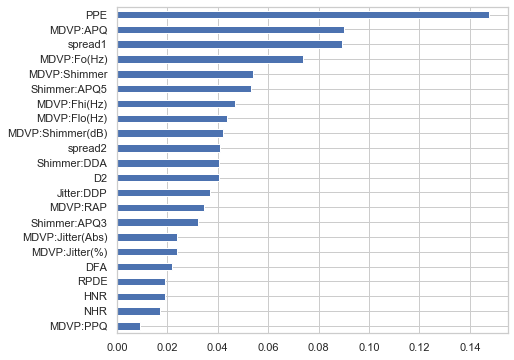

In [129]:
feature_importances = pd.Series(modelRF.feature_importances_, index = X_test.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6));

# Confusion Matrix

In [130]:
def draw_confusion_matrix(y_test,y_predict):
    cm=metrics.confusion_matrix(y_test,y_predict, labels=[1,0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,fmt="g",cmap='Blues')

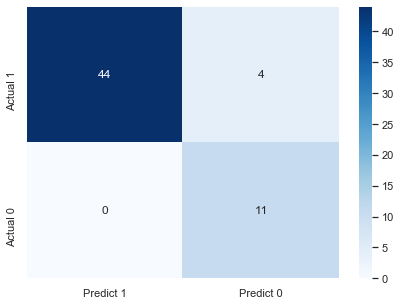

In [131]:
# confusion matrix for SVM
draw_confusion_matrix(y_test,y_predict_svm)

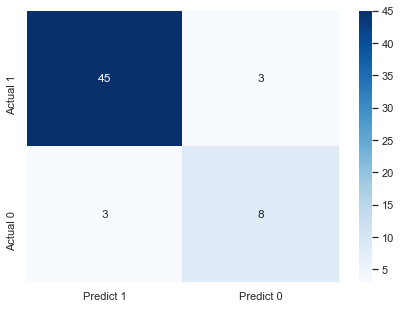

In [132]:
# confusion matrix for Random Forest
draw_confusion_matrix(y_test,y_predict_rf)

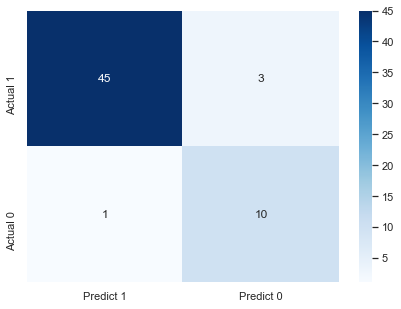

In [133]:
# confusion matrix for Meta Classifier
draw_confusion_matrix(y_test,y_predict_stacked)

In [134]:
from sklearn.metrics import classification_report

In [135]:
# For SVM model

In [136]:
print(classification_report(y_test, y_predict_svm, digits=2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.92      0.96        48

    accuracy                           0.93        59
   macro avg       0.87      0.96      0.90        59
weighted avg       0.95      0.93      0.94        59



In [137]:
# For Random Forest

In [138]:
print(classification_report(y_test, y_predict_rf, digits=2))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.94      0.94      0.94        48

    accuracy                           0.90        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.90      0.90      0.90        59



In [139]:
# For Meta Classifier

In [140]:
print(classification_report(y_test, y_predict_stacked, digits=2))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.98      0.94      0.96        48

    accuracy                           0.93        59
   macro avg       0.87      0.92      0.90        59
weighted avg       0.94      0.93      0.93        59



# check ROC AUC score for SVM, Random Forest and Meta-Classifier

In [141]:
pred_probSVM = modelSVM.predict_proba(X_test_scaled)

In [142]:
pred_probRF = modelRF.predict_proba(X_test)

In [143]:
pred_probMeta = modelStacking.predict_proba(X_test_scaled)

In [144]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [145]:
fprSVM, tprSVM, threshSVM = roc_curve(y_test, pred_probSVM[:,1], pos_label=1)
fprRF, tprRF, threshRF = roc_curve(y_test, pred_probRF[:,1], pos_label=1)
fprMeta, tprMeta, threshMeta = roc_curve(y_test, pred_probMeta[:,1], pos_label=1)

In [146]:
auc_scoreSVM = roc_auc_score(y_test, pred_probSVM[:,1])
auc_scoreRF = roc_auc_score(y_test, pred_probRF[:,1])
auc_scoreMeta = roc_auc_score(y_test, pred_probMeta[:,1])

In [147]:
AUCScoreData = np.array([auc_scoreSVM,auc_scoreRF,auc_scoreMeta]).T
dfROCAUC = pd.DataFrame(AUCScoreData, index=["SVM","Random Forest","Meta-Classifier"], columns=["ROC AUC"])
dfROCAUC.sort_values(by=["ROC AUC"], ascending=False)

,ROC AUC
SVM,0.984848
Meta-Classifier,0.969697
Random Forest,0.910038


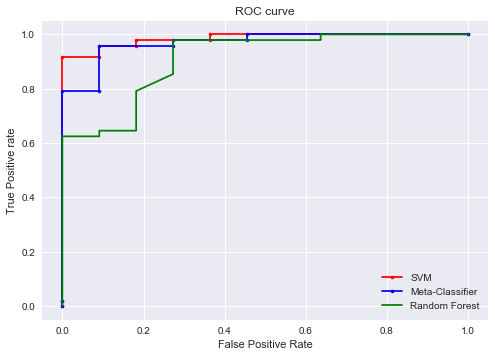

In [148]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fprSVM, tprSVM, marker='.',color='red', label='SVM')
plt.plot(fprMeta, tprMeta, marker='.',color='blue', label='Meta-Classifier')
plt.plot(fprRF, tprRF, marker=',',color='green', label='Random Forest')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Check Precision Recall Curve

In [149]:
from sklearn.metrics import precision_recall_curve

In [150]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, pred_probSVM[:,1])
rf_precision, rf_recall, _ = precision_recall_curve(y_test, pred_probRF[:,1])
meta_precision, meta_recall, _ = precision_recall_curve(y_test, pred_probMeta[:,1])

In [151]:
auc_score_SVM = auc(svm_recall, svm_precision)
auc_score_RF = auc(rf_recall, rf_precision)
auc_score_Meta = auc(meta_recall, meta_precision)

In [152]:
AUCPRData = np.array([auc_score_SVM,auc_score_RF,auc_score_Meta]).T
dfAUC = pd.DataFrame(AUCPRData, index=["SVM","Random Forest","Meta-Classifier"], columns=["Precision/Recall AUC"])
dfAUC.sort_values(by=["Precision/Recall AUC"], ascending=False)

,Precision/Recall AUC
SVM,0.996617
Meta-Classifier,0.992865
Random Forest,0.976961


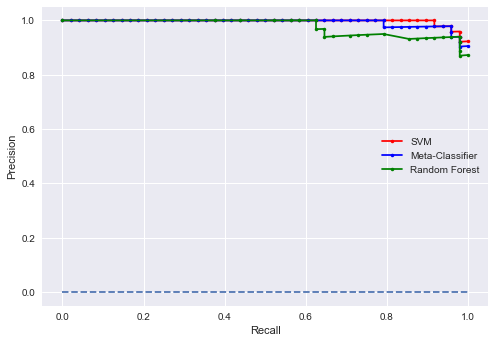

In [153]:
plt.plot([0, 1], [0, 0], linestyle='--')
plt.plot(svm_recall, svm_precision, marker='.',color='red',label='SVM')
plt.plot(meta_recall, meta_precision, marker='.',color='blue',label='Meta-Classifier')
plt.plot(rf_recall, rf_precision, marker='.',color='green', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [155]:
# Let's use PyCaret 2.0 and check

In [156]:
from pycaret.classification import *

In [157]:
pl_setup = setup(data=pdata, target="status", session_id=1, ignore_features=['name'], normalize = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(195, 24)"
4,Missing Values,False
5,Numeric Features,22
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [158]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.8899,0.9543,0.9519,0.9109,0.9295,0.6803,0.6938,0.4501
1,Light Gradient Boosting Machine,0.8828,0.9466,0.9224,0.9228,0.9221,0.6827,0.6857,0.0799
2,K Neighbors Classifier,0.8754,0.9458,0.9219,0.9132,0.9172,0.6648,0.6670,0.0080
3,Ada Boost Classifier,0.8754,0.9163,0.9224,0.9152,0.9181,0.6496,0.6547,0.1967
4,Extreme Gradient Boosting,0.8754,0.9346,0.9519,0.8912,0.9200,0.6377,0.6519,0.4326
5,CatBoost Classifier,0.8677,0.9456,0.9519,0.8849,0.9160,0.6075,0.6254,4.8298
6,Gradient Boosting Classifier,0.8606,0.9011,0.9419,0.8817,0.9105,0.5949,0.6059,0.2531
7,Ridge Classifier,0.8378,0.0000,0.9519,0.8536,0.8986,0.4950,0.5293,0.0204
8,Logistic Regression,0.8307,0.8896,0.9229,0.8642,0.8916,0.5060,0.5196,0.0250
9,Random Forest Classifier,0.8164,0.8627,0.8943,0.8688,0.8810,0.4768,0.4800,0.1346


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [159]:
svmModel = create_model("rbfsvm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9697,1.0000,0.8462,0.9167,0.4400,0.5311
1,0.9286,0.8485,1.0000,0.9167,0.9565,0.7586,0.7817
2,0.9286,0.8788,1.0000,0.9167,0.9565,0.7586,0.7817
3,0.7143,0.7250,1.0000,0.7143,0.8333,0.0000,0.0000
4,0.8571,0.8750,1.0000,0.8333,0.9091,0.5882,0.6455
5,0.9286,0.9750,0.9000,1.0000,0.9474,0.8372,0.8485
6,0.8462,0.8333,1.0000,0.8333,0.9091,0.4348,0.5270
7,0.8462,0.8667,1.0000,0.8333,0.9091,0.4348,0.5270
8,0.7692,0.6667,1.0000,0.7692,0.8696,0.0000,0.0000
9,0.9231,0.8333,1.0000,0.9091,0.9524,0.7547,0.7785


In [163]:
tuned_svm_model = tune_model(svmModel)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.9091,0.8182,0.9000,0.8571,0.4324,0.4404
1,0.9286,0.9697,1.0000,0.9167,0.9565,0.7586,0.7817
2,0.8571,0.9697,0.9091,0.9091,0.9091,0.5758,0.5758
3,0.7857,0.8250,0.8000,0.8889,0.8421,0.5116,0.5185
4,0.9286,1.0000,0.9000,1.0000,0.9474,0.8372,0.8485
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9231,1.0000,1.0000,0.9091,0.9524,0.7547,0.7785
7,0.7692,0.8667,0.9000,0.8182,0.8571,0.2642,0.2725
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.7692,0.8667,0.9000,0.8182,0.8571,0.2642,0.2725


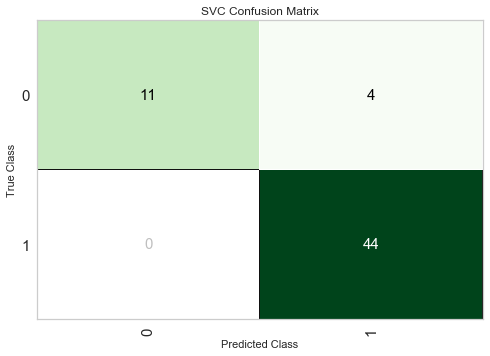

In [165]:
plot_model(tuned_svm_model, plot='confusion_matrix')

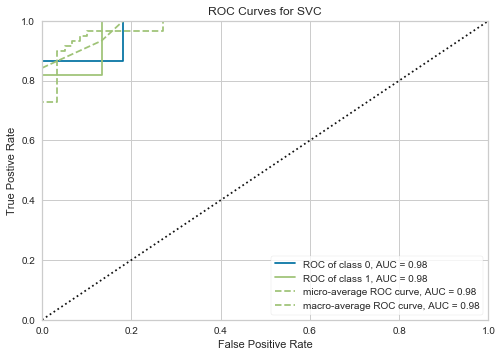

In [166]:
plot_model(tuned_svm_model, plot='auc')

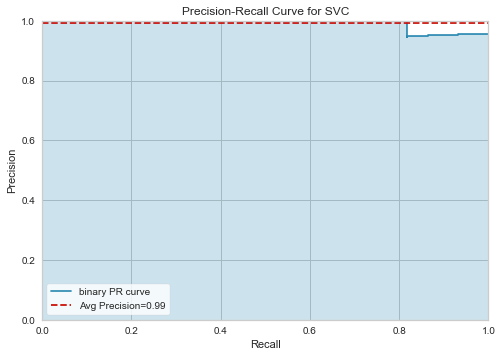

In [167]:
plot_model(tuned_svm_model, plot='pr')

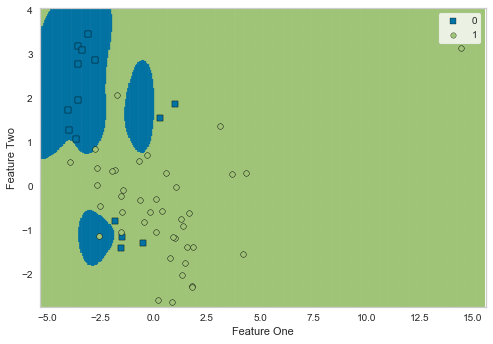

In [168]:
plot_model(tuned_svm_model, plot='boundary')

In [169]:
svm_final = finalize_model(tuned_svm_model)

In [170]:
svm_final

SVC(C=39.06, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [171]:
# Best model as per current analysis is SVM with rbf kernel